# Do / To Do

In [ ]:
# 2022-12-21
## Do - 오전 : 데이터탐색 리뷰, 프로젝트 주제 타당성 검토, 데이터 및 기술타당성 검토, 계획서 작성 및 제출
## Do - 오후 : 딥러닝 모델 준비 - OutPut이 2종류인 이미지 분류 Sequential 모델 작성 (중)
## To Do : 딥러닝 Sequential 모델 완성 / CNN 모델 추가 / 객체탐지 attatch / Mobile - Code 간 연동

# 배움

In [ ]:
# softmax : 모든 변수 확률값의 합이 1
# sigmoid : 0 ~ 1 사이 값을 가짐??

In [ ]:
# loss 함수
## spares_..._crossentropy : 원 핫 인코딩에 대한 로스
## ..._crossentropy : 레이블 인코딩에 대한 로스

# 사전 준비 (Import, Mount)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob as glob
import cv2


In [2]:

path = '/Users/jongya/Desktop/data/data'

# 구글 드라이브 공유 드라이브 마운트 방법
# 구글 드라이브 -> 공유드라이브 오른쪽 클릭 -> 바로가기 추가 -> My Drive에 추가
# https://sundries-in-myidea.tistory.com/96

# 정의부

In [3]:
# 이미지파일 : png, jpg, jpeg

x_pixel = 112 # 이미지 x축 크기
y_pixel = 112 # 이미지 y축 크기
channel = 3 # RGB 색상

In [4]:
# img_list : 모든 이미지파일
# label_list : 이미지에 대한 label

In [5]:
# 인코딩 정의

## fresh / stale -> 레이블 인코딩
## fresh = ['stale', 'fresh']

## kind -> 원 핫 인코딩
## kind_temp = ['apple', 'banana', 'bittergourd', 'capsicum', 'orange', 'tomato']


# 데이터 준비

## data preperence

In [6]:
class dataset:

  # 인코딩 값 Notice
  fresh = ['stale', 'fresh']
  kind = ['apple', 'banana', 'bittergourd', 'capsicum', 'orange', 'tomato']


  def load_data():
    # 모든 이미지 경로명 데이터를 리스트로 담아 뽑기
    img_list_png = glob.glob(path + '/*/*.png', recursive=True)
    img_list_jpg = glob.glob(path + '/*/*.jpg', recursive=True)
    img_list_jpeg = glob.glob(path + '/*/*.jpeg', recursive=True)
    img_list = img_list_png + img_list_jpg + img_list_jpeg
    return img_list
  

  def label_split(img_list):
    # 레이블 종류별로 나누기 (fresh, kind)
    fresh_list =  []
    kind_list =  []
    for i in img_list:
      fresh_list.append(i.split('/')[7].split('_')[0])
      kind_list.append(i.split('/')[7].split('_')[1])
    return fresh_list, kind_list
  

  def label_encoding(kind_or_fresh_list):
    # 레이블 인코딩
    label = list(set(kind_or_fresh_list))
    df = kind_or_fresh_list.copy()
    for i, j in enumerate(df):
      for n, m in enumerate(label):
        if j == m:
          df[i] = n
    return np.array(df)

  
  def train_val_test(img_list, train_test_rate=0.3, train_val_rate=0.2):
    # train - val - test 데이터셋 분리
    from sklearn.model_selection import train_test_split
    import numpy as np

    img_list = dataset.load_data()
    fresh_list, kind_list = dataset.label_split(img_list)

    ## x data
    x_train, x_test = train_test_split(img_list, test_size = train_test_rate)
    x_train, x_val = train_test_split(x_train, test_size = train_val_rate)

    y_train_fresh, y_train_kind = dataset.label_split(x_train)
    y_val_fresh, y_val_kind = dataset.label_split(x_val)
    y_test_fresh, y_test_kind = dataset.label_split(x_test)

    ## y data
    y_train_fresh = dataset.label_encoding(y_train_fresh)
    y_train_kind = dataset.onehot_encoding(y_train_kind)
    y_val_fresh = dataset.label_encoding(y_val_fresh)
    y_val_kind = dataset.onehot_encoding(y_val_kind)
    y_test_fresh = dataset.label_encoding(y_test_fresh)
    y_test_kind = dataset.onehot_encoding(y_test_kind)

    return x_train, x_val, x_test, y_train_fresh, y_val_fresh, y_test_fresh, y_train_kind, y_val_kind, y_test_kind


  def view_sample_img(img_list, sample_size=6):
    # img list에서 샘플 이미지 보기
    import random
    import matplotlib.pyplot as plt
    from keras.utils import img_to_array
    from PIL import Image
    rand_idx = random.sample(img_list, sample_size)
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(f'samples / size = {sample_size}')
    for i, j in enumerate(rand_idx):
      img_path = j
      plt.subplot(sample_size/3,3,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(Image.open(j))
    plt.tight_layout()
    plt.show()



  def check_FF(fresh, fruit):
  # 신선도 상태, 6가지 과채류 종류 
    labels = np.zeros(7,)
    # 0 : fresh, 1~6  : apple, banana, bitter, capsicum, orange, tomato

    # fresh check , 0이면 stale
    if (fresh == 'fresh'):
      labels[0] = 1

    # fruit check
    if (fruit == 'apple'):
      labels[1] = 1
    elif (fruit == 'banana'):
      labels[2] = 1
    elif (fruit == 'bitteregourd'):
      labels[3] = 1
    elif (fruit == 'capsicum'):
      labels[4] = 1
    elif (fruit == 'orange'):
      labels[5] = 1
    elif (fruit == 'tomato'):
      labels[6] = 1

    return labels


In [ ]:
conda install sickit-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.

In [9]:
# train - test - split
from sklearn.model_selection import train_test_split
import numpy as np

all_data = np.array(dataset.load_data())

ModuleNotFoundError: No module named 'sklearn'

In [8]:
all_data[0]

NameError: name 'all_data' is not defined

In [ ]:
for i in range(len(all_data)) :
    all_data[i] = all_data[i].replace('\\','/')

In [ ]:
all_data[0]

'C:/Users/park/Downloads/archive/fresh_apple/rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png'

In [ ]:
fresh_and_fruit = all_data[0].split('/')[-2].split('_')

In [ ]:
fresh_and_fruit

['fresh', 'apple']

In [ ]:


all_labels = np.empty((all_data.shape[0], 7))

for i, data in enumerate(all_data):
    fresh_and_fruit = all_data[i].split('/')[-2].split('_')
    
    
    # .split('/')[-2] 전체 경로명에서 라벨로 쓰일 폴더 디렉토리리

    fresh = fresh_and_fruit[0]
    fruit = fresh_and_fruit[1]
    # print(color,clothes)
    
    # 폴더명에 따라 라벨로 바꾸는 전처리 과정정
    labels = dataset.check_FF(fresh, fruit)
    #check_cc 위에서 선언된 함수

    all_labels[i] = labels




In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(all_data, all_labels, shuffle = True, test_size = 0.3,
                                                   random_state = 99)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, shuffle = True, test_size = 0.3,
                                                 random_state = 99)

In [ ]:
train_df = pd.DataFrame({'image':train_x, 'fresh':train_y[:, 0], 'apple':train_y[:, 1],
                        'banana':train_y[:, 2], 'bittergourd':train_y[:, 3], 'capsicum':train_y[:, 4],
                        'orange':train_y[:, 5], 'tomato':train_y[:, 6]})

  # 0 : fresh, 1~6  : apple, banana, bitter, capsicum, orange, tomato

val_df = pd.DataFrame({'image':val_x, 'fresh':val_y[:, 0], 'apple':val_y[:, 1],
                        'banana':val_y[:, 2], 'bittergourd':val_y[:, 3], 'capsicum':val_y[:, 4],
                        'orange':val_y[:, 5], 'tomato':val_y[:, 6]})

test_df = pd.DataFrame({'image':test_x, 'fresh':test_y[:, 0], 'apple':test_y[:, 1],
                        'banana':test_y[:, 2], 'bitter':test_y[:, 3], 'capsicum':test_y[:, 4],
                        'orange':test_y[:, 5], 'tomato':test_y[:, 6]})

In [ ]:
train_df

,image,fresh,apple,banana,bittergourd,capsicum,orange,tomato
0,C:/Users/park/Downloads/archive/stale_capsicum...,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,C:/Users/park/Downloads/archive/stale_apple/Sc...,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,C:/Users/park/Downloads/archive/fresh_capsicum...,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,C:/Users/park/Downloads/archive/fresh_tomato/I...,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,C:/Users/park/Downloads/archive/fresh_bitter_g...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7188,C:/Users/park/Downloads/archive/stale_banana/r...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7189,C:/Users/park/Downloads/archive/stale_capsicum...,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7190,C:/Users/park/Downloads/archive/fresh_capsicum...,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7191,C:/Users/park/Downloads/archive/fresh_banana/r...,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Image Generator

In [ ]:
batch_size = 32
class_col = ['fresh','apple', 'banana', 'bittergourd', 'capsicum', 'orange', 'tomato']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 이미지 제너레이터 선언
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)



# 모델 선언

In [ ]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Concatenate


inputs = Input(shape = ( 112, 112, 3))

conv16 = Conv2D(16, (3,3), activation='relu')(inputs)
max16 =MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same')(conv16)

conv32 = Conv2D(32, (3,3), activation='relu')(max16)
max32 =MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same')(conv32)

conv64 = Conv2D(64, (3,3), activation='relu')(max32)
max64 =MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same')(conv64)

flat = Flatten(name = 'flatten')(max64)

outputs = Dense(7, activation = 'sigmoid')(flat)

model = Model(inputs = inputs, outputs = outputs)

# # model.summary()

# from keras.models import Sequential

# model = Sequential()
# model.add(Flatten(input_shape=(112,112,3)))
# # 3 : rgb값

# model.add(Dense(128,activation='relu'))

# model.add(Dense(64,activation='relu'))

# model.add(Dense(7,activation='sigmoid'))
# # 컬러 인덱스를 제외한 컬러 + 옷 종류
# # 소프트 맥스 -> 다중 분류
# # 시그모이드 -> 다중 레이블
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
# 모델 살펴보기
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['CategoricalAccuracy'])

# 컴파일

In [ ]:

def get_steps(num_samples, batch_size):
  if (num_samples % batch_size) > 0:
    return ( num_samples // batch_size ) + 1

  else :
    return ( num_samples // batch_size )

batch_size = 32
class_col = ['fresh','apple', 'banana', 'bittergourd', 'capsicum', 'orange', 'tomato']



In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, 
                                                    x_col = 'image', 
                                                    y_col = class_col, 
                                                    target_size=(112,112),
                                                    color_mode = 'rgb',
                                                    class_mode = 'raw',
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    seed = 42)


val_generator = val_datagen.flow_from_dataframe(dataframe=val_df, 
                                                    x_col = 'image', 
                                                    y_col = class_col, 
                                                    target_size=(112,112),
                                                    color_mode = 'rgb',
                                                    class_mode = 'raw',
                                                    batch_size = batch_size,
                                                    shuffle = True
                                                )

Found 7193 validated image filenames.
Found 3084 validated image filenames.


In [ ]:
model.fit(train_generator,
          steps_per_epoch = get_steps(len(train_df), batch_size),
          validation_data= val_generator,
          validation_steps = get_steps(len(val_df),batch_size),
          epochs = 10
          )


Epoch 1/10
225/225 [==============================] - 66s 244ms/step - loss: 0.2423 - binary_accuracy: 0.8873 - val_loss: 0.1383 - val_binary_accuracy: 0.9432
Epoch 2/10
225/225 [==============================] - 30s 134ms/step - loss: 0.1095 - binary_accuracy: 0.9565 - val_loss: 0.0900 - val_binary_accuracy: 0.9661
Epoch 3/10
225/225 [==============================] - 25s 113ms/step - loss: 0.0813 - binary_accuracy: 0.9695 - val_loss: 0.0737 - val_binary_accuracy: 0.9724
Epoch 4/10
225/225 [==============================] - 26s 114ms/step - loss: 0.0663 - binary_accuracy: 0.9747 - val_loss: 0.0664 - val_binary_accuracy: 0.9755
Epoch 5/10
225/225 [==============================] - 25s 109ms/step - loss: 0.0574 - binary_accuracy: 0.9789 - val_loss: 0.0719 - val_binary_accuracy: 0.9732
Epoch 6/10
225/225 [==============================] - 24s 107ms/step - loss: 0.0483 - binary_accuracy: 0.9823 - val_loss: 0.0565 - val_binary_accuracy: 0.9788
Epoch 7/10
225/225 [==========================

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, 
                                                    x_col = 'image', 
                                                    #y_col = None, # 지우거나, 테스트 데이터는 결과를 주지 않는다. 
                                                    target_size=(112,112),
                                                    color_mode = 'rgb',
                                                    class_mode = None ,# 지우거나
                                                    batch_size = batch_size,
                                                    shuffle = False)
preds = model.predict(test_generator,steps = get_steps(len(test_df),batch_size), verbose = 1) 

Found 4405 validated image filenames.
138/138 [==============================] - 16s 117ms/step


In [ ]:
import matplotlib.pyplot as plt
# 예측 결과를 확인
do_preds = preds[:8]
# 8 개만

In [ ]:
len(preds)

4405

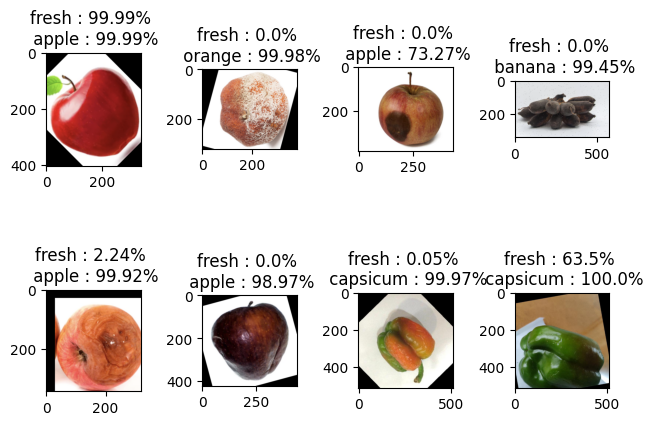

In [ ]:

n = 0
import matplotlib.pyplot as plt
# 예측 결과를 확인
do_preds = preds[n:n+8]
# 8 개만
for i, pred in enumerate(do_preds):
  plt.subplot(2,4,i+1)
  prob = zip(class_col, list(pred))
  prob_list = list(prob)
  fresh_score = prob_list[0]
  fruit_score = prob_list[1:7]
  # pred에는 각 콜럼일 확률이 모두 있다.

  # print(list(prob))
  prob_ = sorted(fruit_score, key = lambda x : x[1], reverse = True)
  # 모든 확률에 대해 가장 큰 값으로 정렬하면서, 매칭해준 class_col 도 정렬된다.

  # print(prob)

  image = cv2.imread(test_df['image'][i+n])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.title(f'{fresh_score[0]} : {round(fresh_score[1]*100, 2)}% \n {prob_[0][0]} : {round(prob_[0][1]*100, 2)}%')
  # 가장 확률이 큰 값과 두 번째로 확률이 큰 값을 출력한다.

plt.tight_layout()
plt.show()

In [ ]:
fresh_score[0]

'fresh'

In [ ]:
fresh_score[1]

0.6350126

In [ ]:
prob_[0][1]

0.9999999

In [ ]:
path='c:/Users/park/Downloads/stale_apple.jpeg'
from PIL import Image
import numpy as np
image = Image.open(path)
image = image.resize((112,112))
print(np.array(image).shape)
x = np.expand_dims(np.array(image),0)
#print(x.shape)
np.round(model.predict(x),2)

(112, 112, 3)
1/1 [==============================] - 1s 537ms/step


array([[1., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 19ms/step


array([[1., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model.save_weights('C:/pythonDir/deeplearning/model/cnn_sig/model_cnn_simiod')